In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
housing_dataset = fetch_california_housing()

In [ ]:
print(housing_dataset.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
df = pd.DataFrame(housing_dataset.data, columns=housing_dataset.feature_names)
df["target"] = housing_dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(housing_dataset.data, housing_dataset.target)

In [ ]:
x_train_scaled = StandardScaler().fit_transform(x_train)
x_test_scaled = StandardScaler().fit_transform(x_test)

In [ ]:
scaled_train_df = pd.DataFrame(x_train_scaled, columns=housing_dataset.feature_names)
scaled_train_df["target"] = y_train

# Creare de model

In [ ]:
input_shape = x_train_scaled[0].shape
input_shape

(8,)

In [ ]:
model_1 = tf.keras.models.Sequential(
      [   # Input neschimbabil
          tf.keras.layers.Input(shape=input_shape),

           tf.keras.layers.Dense(64, activation="relu"),
           tf.keras.layers.Dense(32, activation="relu"),


          # Output neschimbabil
          tf.keras.layers.Dense(1),

      ]

)

In [ ]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse", metrics=["mae", "mse", "RootMeanSquaredError"])


In [ ]:
model_1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
64 * 8 + 64

576

In [ ]:
64 * 32 + 32

2080

In [ ]:
result_model_1 = model_1.fit(x_train_scaled, y_train, epochs=100, verbose=0)

In [ ]:
history1 = result_model_1.history
pd.DataFrame(history1)

,RootMeanSquaredError,loss,mae,mse
0,0.941809,0.887004,0.644207,0.887004
1,0.648763,0.420894,0.463268,0.420894
2,0.628493,0.395003,0.442234,0.395003
3,0.602703,0.363251,0.426874,0.363251
4,0.600291,0.360349,0.421230,0.360349
...,...,...,...,...
95,0.478837,0.229285,0.328166,0.229285
96,0.476655,0.227200,0.325973,0.227200
97,0.477558,0.228061,0.326609,0.228061
98,0.478393,0.228860,0.327708,0.228860


In [ ]:
history1.keys()

dict_keys(['RootMeanSquaredError', 'loss', 'mae', 'mse'])

Text(0, 0.5, 'Loss')

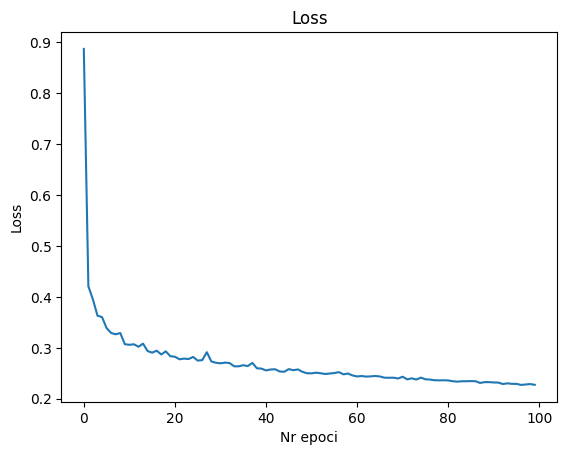

In [ ]:
loss = history1['loss']
plt.plot(loss)
plt.title("Loss")
plt.xlabel("Nr epoci")
plt.ylabel("Loss")

In [ ]:
model_2 = tf.keras.models.Sequential(
      [   # Input neschimbabil
          tf.keras.layers.Input(shape=input_shape),

           tf.keras.layers.Dense(64, activation="relu"),
           tf.keras.layers.Dense(32, activation="relu"),


          # Output neschimbabil
          tf.keras.layers.Dense(1),

      ]

)
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse", metrics=["mae", "mse", "RootMeanSquaredError"])

# SCHIMBARE RESULT_MODEL_2 -> validation_split=0.2

In [ ]:
result_model_2 = model_2.fit(x_train_scaled, y_train, validation_split=0.2, epochs=50, verbose=0)

In [ ]:
history2 = result_model_2.history
history2.keys()

dict_keys(['RootMeanSquaredError', 'loss', 'mae', 'mse', 'val_RootMeanSquaredError', 'val_loss', 'val_mae', 'val_mse'])

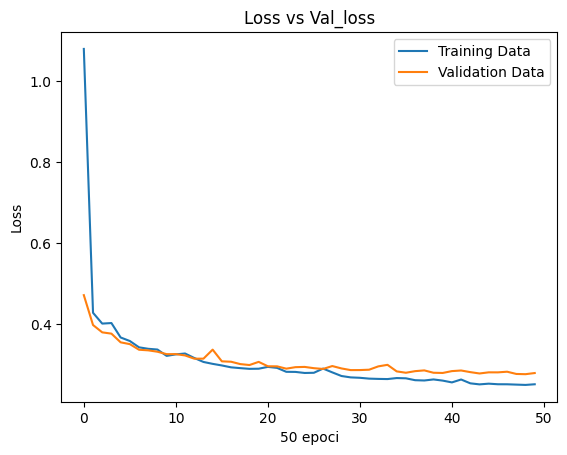

In [65]:
loss = history2['loss']
plt.plot(loss)

val_loss = history2['val_loss']
plt.plot(val_loss)

plt.title("Loss vs Val_loss")


plt.xlabel("50 epoci")
plt.ylabel("Loss")
plt.legend(["Training Data", "Validation Data"])

In [ ]:
model_3 = tf.keras.models.Sequential(
      [   # Input neschimbabil
          tf.keras.layers.Input(shape=input_shape),

           tf.keras.layers.Dense(64, activation="relu"),
           tf.keras.layers.Dense(32, activation="relu"),


          # Output neschimbabil
          tf.keras.layers.Dense(1),

      ]

)
model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse", metrics=["mae", "mse", "RootMeanSquaredError"])

# SCHIMBARE RESULT_MODEL_3 -> ECPOCHS -> 300

In [60]:
result_model_3 = model_3.fit(x_train_scaled, y_train, validation_split=0.2, epochs=300, verbose=0)

In [62]:
history3 = result_model_3.history
history3.keys()

dict_keys(['RootMeanSquaredError', 'loss', 'mae', 'mse', 'val_RootMeanSquaredError', 'val_loss', 'val_mae', 'val_mse'])

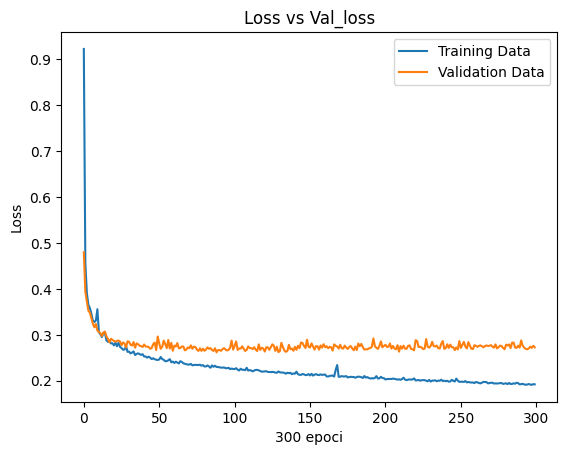

In [64]:
loss = history3['loss']
plt.plot(loss)

val_loss = history3['val_loss']
plt.plot(val_loss)

plt.title("Loss vs Val_loss")


plt.xlabel("300 epoci")
plt.ylabel("Loss")
plt.legend(["Training Data", "Validation Data"])

In [67]:
len(history3['loss'])


300

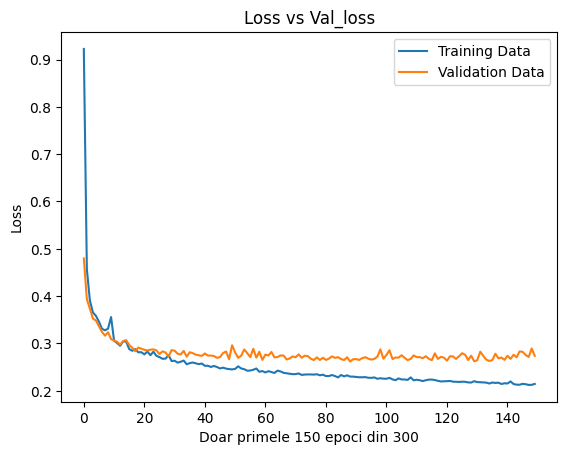

In [69]:
loss = history3['loss'][:150]
plt.plot(loss)

val_loss = history3['val_loss'][:150]
plt.plot(val_loss)

plt.title("Loss vs Val_loss")


plt.xlabel("Doar primele 150 epoci din 300")
plt.ylabel("Loss")
plt.legend(["Training Data", "Validation Data"])

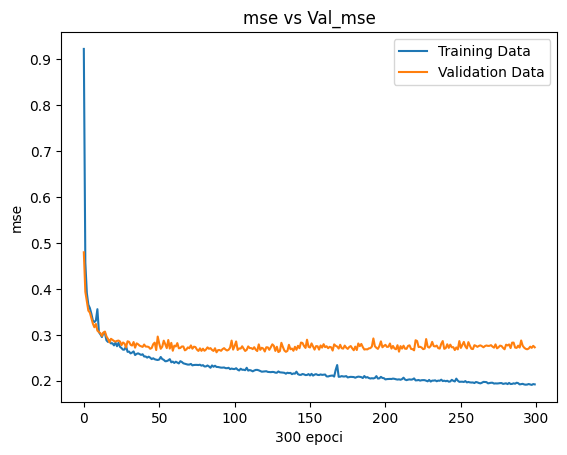

In [70]:
mse = history3['mse']
plt.plot(mse)

val_mse = history3['val_mse']
plt.plot(val_mse)

plt.title("mse vs Val_mse")


plt.xlabel("300 epoci")
plt.ylabel("mse")
plt.legend(["Training Data", "Validation Data"])